In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import tables as tb

import sys
sys.path.append("..")
from field.cascade import LagrangianMapping3D, Precision

THREADS = os.cpu_count()
SEED = 20240115

Copyright (c) 2024 Jeremiah Lübke <jeremiah.luebke@rub.de>,
Frederic Effenberger, Mike Wilbert, Horst Fichtner, Rainer Grauer

Distributed under the MIT License.
 
This is the implementation of the algorithm described in
 > J. Lübke, F. Effenberger, M. Wilbert, H. Fichtner and R. Grauer,
 > Towards Synthetic Magnetic Turbulence with Coherent Structures
 > (2024).

If the software contributes to findings you decide to present or publish,
please be so kind and cite this reference. Thank you!



In [2]:
!rm test-lm256.h5
!rm -r test-lm256_xdmf/

rm: cannot remove 'test-lm256.h5': No such file or directory
rm: cannot remove 'test-lm256_xdmf/': No such file or directory


initializing FFTW with wisdom from disk (if this step fails: delete wisdom file).


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

running cascade: B.
running scale 0.5. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.33371. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.222725. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.148651. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0992126. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0662164. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0441942. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0294961. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0196863. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.013139. generating omega, the

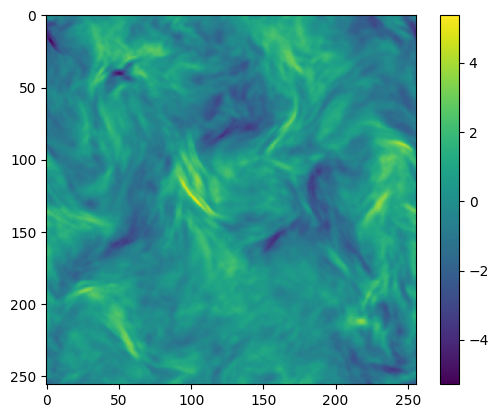

In [3]:
np.random.seed(SEED)
c = LagrangianMapping3D(
    name="B",
    cfl=0.1,
    grid_size=256,
    precision=Precision.DOUBLE,
    num_threads=THREADS,
    wisdom_path="../wisdom/",
)
writer_kwds = dict(
    write_field=True,
    write_xdmf=True,
    filename=f"./test-lm{c.grid_size}.h5",
    chunkshape=(256, 256, 256),
)
res = c(
    other=False,
    number_of_modes=12,
    correlation_length=0.5,
    spectral_index=1 / 3,
    intermittency_parameter=0.01,
    **writer_kwds,
)
plt.imshow(res[0,0])
plt.colorbar()

randomizing phases.
writing /home/fs1/jel/synth-mag-turb-publication/examples/test-lm256.h5:/randomphases/i0/B. writing attributes.
writing /home/fs1/jel/synth-mag-turb-publication/examples/test-lm256_xdmf/randomphases_i0.xdmf.


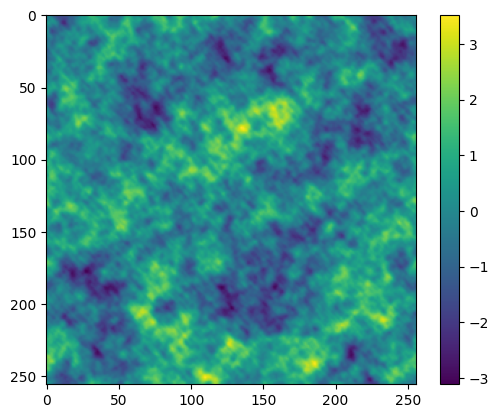

In [4]:
res = c.randomize_phases(**writer_kwds)
plt.imshow(res[0,0])
plt.colorbar()

In [5]:
!h5ls -r test-lm256.h5

/                        Group
/lagrangian_mapping      Group
/lagrangian_mapping/i0   Group
/lagrangian_mapping/i0/B0 Dataset {256, 256, 256}
/lagrangian_mapping/i0/B1 Dataset {256, 256, 256}
/lagrangian_mapping/i0/B2 Dataset {256, 256, 256}
/randomphases            Group
/randomphases/i0         Group
/randomphases/i0/B0      Dataset {256, 256, 256}
/randomphases/i0/B1      Dataset {256, 256, 256}
/randomphases/i0/B2      Dataset {256, 256, 256}


In [6]:
!h5dump -n 1 test-lm256.h5 | grep attribute | grep lagrangian_mapping | grep -v B

 attribute  /lagrangian_mapping/CLASS
 attribute  /lagrangian_mapping/TITLE
 attribute  /lagrangian_mapping/VERSION
 attribute  /lagrangian_mapping/i0/CLASS
 attribute  /lagrangian_mapping/i0/TITLE
 attribute  /lagrangian_mapping/i0/VERSION
 attribute  /lagrangian_mapping/i0/args
 attribute  /lagrangian_mapping/i0/conf
 attribute  /lagrangian_mapping/i0/kwds
 attribute  /lagrangian_mapping/i0/note
 attribute  /lagrangian_mapping/i0/version


In [7]:
with tb.open_file("test-lm256.h5") as fp:
    print(fp.root.lagrangian_mapping.i0._v_attrs.args)
    print(fp.root.lagrangian_mapping.i0._v_attrs.kwds)
    print(fp.root.lagrangian_mapping.i0._v_attrs.conf)
    print(fp.root.lagrangian_mapping.i0._v_attrs.version)

[]
{'other': False, 'number_of_modes': 12, 'correlation_length': 0.5, 'spectral_index': 0.3333333333333333, 'intermittency_parameter': 0.01}
{'grid_size': 256, 'dimension': 3, 'components': 3, 'L_box': 1.0, 'precision': <Precision.DOUBLE: (dtype('float64'), dtype('complex128'))>, 'num_threads': 96, 'cfl': 0.1}
a4847be-dirty


loading ./test-lm256.h5:/lagrangian_mapping/i0 into existing buffer

.


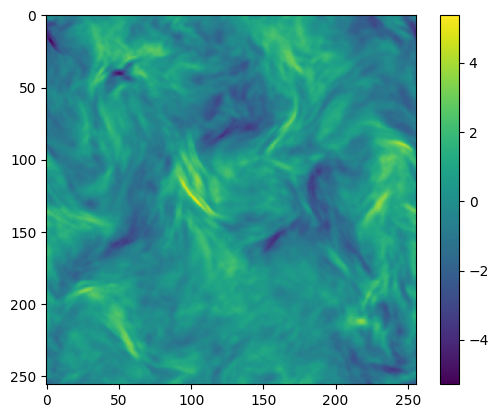

In [8]:
res = c.load_h5_dataset("./test-lm256.h5", idx=0, kind="lagrangian_mapping", name="B")
plt.imshow(res[0,0])
plt.colorbar()

loading ./test-lm256.h5:/randomphases/i0 into existing buffer.


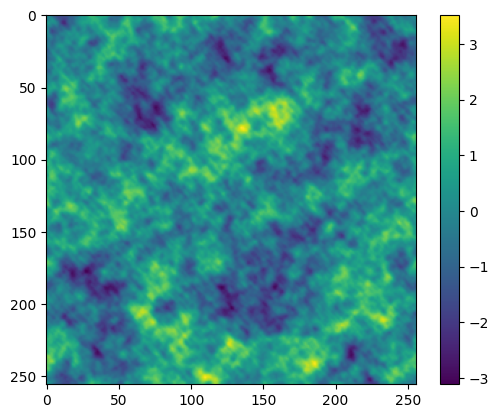

In [9]:
res = c.load_h5_dataset("./test-lm256.h5", idx=0, kind="randomphases", name="B")
plt.imshow(res[0,0])
plt.colorbar()